# IT 402
## Assignment 1

### Name: Niraj Nandish
### Roll no.: 191IT234

In [1]:
import numpy as np
import pandas as pd
import math
from sklearn import datasets
import matplotlib.pyplot as plt
from collections import Counter


Text(0, 0.5, 'Sepal Width')

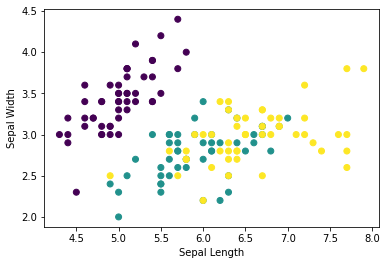

In [2]:
iris_data = datasets.load_iris()
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

plt.scatter(
    iris_data.data[:, 0], iris_data.data[:, 1], c=iris_data.target, cmap=plt.cm.viridis
)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")


In [3]:
df["target"] = iris_data.target

X = df.drop("target", axis=1)
y = df.target


In [4]:
def distBtwPts(a, b, p=1):
    dist = 0
    for i in range(len(a)):
        dist += abs(a[i] - b[i]) ** p
    dist = dist ** (1 / p)
    return dist


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
def knn_predict(X_train, X_test, y_train, y_test, k, p):
    y_hat_test = []
    for test_point in X_test:
        distances = []
        for train_point in X_train:
            distance = distBtwPts(test_point, train_point, p=p)
            distances.append(distance)
        df_dists = pd.DataFrame(data=distances, columns=["dist"], index=y_train.index)
        df_nn = df_dists.sort_values(by=["dist"], axis=0)[:k]
        counter = Counter(y_train[df_nn.index])
        prediction = counter.most_common()[0][0]
        y_hat_test.append(prediction)
    return y_hat_test


In [7]:
y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=4, p=1)

print(y_hat_test)


[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1]


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy: ", accuracy_score(y_test, y_hat_test))


Accuracy:  0.9833333333333333


Text(0, 0.5, 'Accuracy (%)')

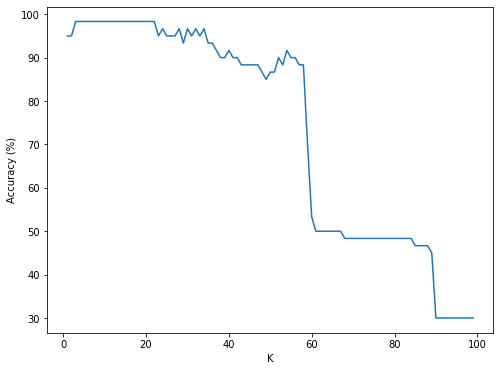

In [9]:
accs = []

for i in range(1, 100):
    y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=i, p=1)
    accs.append(accuracy_score(y_test, y_hat_test)*100)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, 100), accs)
ax.set_xlabel("K")
ax.set_ylabel("Accuracy (%)")


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn_cv = KNeighborsClassifier(n_neighbors=4)
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

print(cv_scores)
print("Mean Cross Validation Score:", np.mean(cv_scores))


[0.96666667 0.96666667 0.96666667 0.96666667 1.        ]
Mean Cross Validation Score: 0.9733333333333334


/Users/niraj/Desktop/IT-Labs/7th-sem/IT402-SC-Lab/venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/niraj/Desktop/IT-Labs/7th-sem/IT402-SC-Lab/venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken